# Importing initial Library


In [8]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt
from tqdm import tqdm

# Data loading and intial cleaning , Ensuring imputation

In [9]:
seed = 7
num_trees= 100
max_features = 3
rng = RandomState(seed)
df = pd.read_csv('preprocessed_R50_1_Wn.csv')
df1=df
X1, y1 = df.iloc[:, :-1], df.iloc[:, -1]
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df = imputer.fit_transform(df)
df=pd.DataFrame(df)
X, y = df.iloc[:, :-1], df.iloc[:, -1]
print(X.shape, y.shape)

(1257, 58) (1257,)


In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA Analysis

In [11]:
intervention=df.iloc[:,-1]
data_min = X.min(axis=0)
data_max = X.max(axis=0)
data_norm = (X-data_min)/(data_max-data_min)

In [12]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

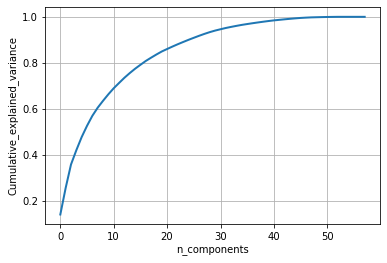

In [13]:
pca.n_components = 58
pca_data = pca.fit_transform(data_norm)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis()
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

In [14]:
pca = PCA(n_components=30)
pca.fit(data_norm)

PCA(n_components=30)

In [15]:
print(pca.components_)

[[-0.10398067  0.33304591 -0.0424304  ... -0.08392434 -0.00637855
   0.01199697]
 [ 0.11004599 -0.32574721 -0.1441809  ...  0.05763228  0.00621607
  -0.0089062 ]
 [-0.1089145   0.2269664  -0.03496202 ... -0.09799297  0.00038297
  -0.01457526]
 ...
 [ 0.10797143  0.1405563   0.04051854 ... -0.24204639  0.03687081
  -0.02136732]
 [-0.05352222 -0.13459632 -0.0408968  ...  0.03758438  0.01217974
   0.05717727]
 [ 0.00266922 -0.00671862 -0.02858317 ... -0.23918244  0.0467189
  -0.12630487]]


[0.66934801 0.54960723 0.48478282 0.29546028 0.27195858 0.23199966
 0.20720313 0.16768687 0.14238836 0.13515225 0.12435446 0.10911723
 0.10731364 0.096874   0.08990126 0.0813812  0.07920488 0.06828017
 0.06583321 0.06201587 0.05123833 0.0506067  0.04836259 0.04581884
 0.04470694 0.04251888 0.04171955 0.03937733 0.03637486 0.03180885]
[0.14073134 0.11555568 0.10192625 0.06212093 0.05717967 0.04877825
 0.04356474 0.03525639 0.02993735 0.02841595 0.0261457  0.02294205
 0.02256284 0.02036789 0.01890186 0.01711051 0.01665293 0.014356
 0.01384152 0.01303892 0.01077293 0.01064013 0.0101683  0.00963347
 0.0093997  0.00893965 0.00877159 0.00827914 0.00764786 0.00668785]


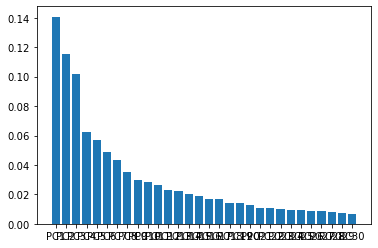

In [16]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
plt.bar(x=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","P20","PC21","PC22","PC23","PC24","PC25","PC26","PC27","PC28","PC29","PC30"],height=pca.explained_variance_ratio_)
plt.show()

In [17]:
weights = pca.components_
weights = weights.transpose()
T = data_norm.dot(weights[:,:2])

In [18]:
print(T)

             0         1
0    -0.150574 -1.454482
1    -0.413795 -0.653607
2    -0.951431 -0.940118
3    -1.214652 -0.139244
4     0.278977 -1.824171
...        ...       ...
1252  0.224779 -1.902895
1253  0.096543 -0.945827
1254  0.023086  0.583535
1255 -0.948602 -1.091872
1256 -1.076838 -0.134803

[1257 rows x 2 columns]


In [19]:
print(pca.explained_variance_)

[0.66934801 0.54960723 0.48478282 0.29546028 0.27195858 0.23199966
 0.20720313 0.16768687 0.14238836 0.13515225 0.12435446 0.10911723
 0.10731364 0.096874   0.08990126 0.0813812  0.07920488 0.06828017
 0.06583321 0.06201587 0.05123833 0.0506067  0.04836259 0.04581884
 0.04470694 0.04251888 0.04171955 0.03937733 0.03637486 0.03180885]


In [20]:
print(pca.explained_variance_ratio_)

[0.14073134 0.11555568 0.10192625 0.06212093 0.05717967 0.04877825
 0.04356474 0.03525639 0.02993735 0.02841595 0.0261457  0.02294205
 0.02256284 0.02036789 0.01890186 0.01711051 0.01665293 0.014356
 0.01384152 0.01303892 0.01077293 0.01064013 0.0101683  0.00963347
 0.0093997  0.00893965 0.00877159 0.00827914 0.00764786 0.00668785]


In [21]:
X=pca.transform(data_norm)

# Splitting The data

In [22]:

from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, 
                                                    random_state=seed)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (1005, 30) (1005,)
Test set:  (252, 30) (252,)


# Importing All model Building Library

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Defining the Model

In [24]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
sv = SVC(kernel='rbf', C=15.0)

LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')

gnb = GaussianNB()

kfold = KFold(n_splits=10)
KNN = KNeighborsClassifier()

BC=BaggingClassifier(base_estimator=dt, n_estimators=num_trees, random_state=seed)

EC=ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

ADC=AdaBoostClassifier(n_estimators=num_trees, random_state=seed) 

GBC=GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)



BCR=BaggingClassifier(base_estimator=rf, n_estimators=num_trees, random_state=seed)

mnb=MultinomialNB()

# Fitting the Model

In [25]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x218ECB36C40)

In [26]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x218ECB36C40)

In [27]:
sv.fit(X_train, y_train)

SVC(C=15.0)

In [28]:
gnb.fit(X_train, y_train)

GaussianNB()

In [29]:
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x218ECB36C40),
                  n_estimators=100, random_state=7)

In [31]:
EC.fit(X_train, y_train)

ExtraTreesClassifier(max_features=3)

In [32]:
ADC.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [33]:
GBC.fit(X_train, y_train)

GradientBoostingClassifier(random_state=7)

In [34]:
LR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [35]:
BCR.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x218ECB36C40),
                  n_estimators=100, random_state=7)

In [36]:
#dt.fit(X_train, y_train)
#rf.fit(X_train, y_train)
#sv.fit(X_train, y_train)
#gnb.fit(X_train, y_train)
#KNN.fit(X_train, y_train)
#BC.fit(X_train, y_train)
#EC.fit(X_train, y_train)
#ADC.fit(X_train, y_train)
#GBC.fit(X_train, y_train)
#LR.fit(X_train, y_train)
#BCR.fit(X_train, y_train)
#mnb.fit(X_train, y_train)

# Predicting the Value

In [37]:
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
sv_pred = sv.predict(X_test)
gnb_pred = gnb.predict(X_test)
KNN_pred = KNN.predict(X_test)
BC_pred = BC.predict(X_test)
EC_pred = EC.predict(X_test)
ADC_pred = ADC.predict(X_test)
GBC_pred = GBC.predict(X_test)
LR_pred = LR.predict(X_test)
BCR_pred = BCR.predict(X_test)


# Getting Accuracy and AUC

In [38]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix

dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
sv_acc = accuracy_score(y_test, sv_pred)
gnb_acc = accuracy_score(y_test, gnb_pred)
KNN_acc = accuracy_score(y_test, KNN_pred)
BC_acc = accuracy_score(y_test, BC_pred)
EC_acc = accuracy_score(y_test, EC_pred)
ADC_acc = accuracy_score(y_test, ADC_pred)
GBC_acc = accuracy_score(y_test, GBC_pred)
LR_acc = accuracy_score(y_test, LR_pred)
BCR_acc = accuracy_score(y_test, BCR_pred)


In [39]:
dt_auc = roc_auc_score(y_test, dt_pred)
rf_auc = roc_auc_score(y_test, rf_pred)
sv_auc = roc_auc_score(y_test, sv_pred)
gnb_auc = roc_auc_score(y_test, gnb_pred)
KNN_auc = roc_auc_score(y_test, KNN_pred)
BC_auc = roc_auc_score(y_test, BC_pred)
EC_auc = roc_auc_score(y_test, EC_pred)
ADC_auc = roc_auc_score(y_test, ADC_pred)
GBC_auc = roc_auc_score(y_test, GBC_pred)
LR_auc = roc_auc_score(y_test, LR_pred)
BCR_auc = roc_auc_score(y_test, BCR_pred)


In [40]:
print('Decision tree acc: %.6f' % dt_acc)
print('Random forest acc: %.6f' % rf_acc)
print('SVM acc: %.6f' % sv_acc)
print('Nabive Baise acc: %.6f' % gnb_acc)
print('KNN: %.6f' % KNN_acc)
print('BAGGING: %.6f' % BC_acc)
print('Extra tree: %.6f' % EC_acc)
print('ADC Boosting: %.6f' % ADC_acc)
print('GDC Boosting: %.6f' % GBC_acc)
print('Logistic: %.6f' % LR_acc)
print('BAGGING Random Forest: %.6f' % BCR_acc)

print()
print('Decision tree AUC: %.6f' % dt_auc)
print('Random forest AUC: %.6f' % rf_auc)
print('SVM AUC: %.6f' % sv_auc)
print('gnb AUC: %.6f' % gnb_auc)
print('KNN AUC: %.6f' % KNN_auc)
print('Bagging AUC: %.6f' % BC_auc)
print('Extra tree AUC: %.6f' % EC_auc)
print('ADC Boosting: %.6f' % ADC_auc)
print('GDC Boosting: %.6f' % GBC_auc)
print('Logistic: %.6f' % LR_auc)
print('BAGGING Random Forest: %.6f' % BCR_auc)


Decision tree acc: 0.634921
Random forest acc: 0.662698
SVM acc: 0.642857
Nabive Baise acc: 0.674603
KNN: 0.607143
BAGGING: 0.654762
Extra tree: 0.654762
ADC Boosting: 0.646825
GDC Boosting: 0.662698
Logistic: 0.698413
BAGGING Random Forest: 0.690476

Decision tree AUC: 0.638357
Random forest AUC: 0.660408
SVM AUC: 0.642641
gnb AUC: 0.672883
KNN AUC: 0.606477
Bagging AUC: 0.652092
Extra tree AUC: 0.652596
ADC Boosting: 0.645791
GDC Boosting: 0.660912
Logistic: 0.696321
BAGGING Random Forest: 0.688130


# Plotting Confusion Matrix

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


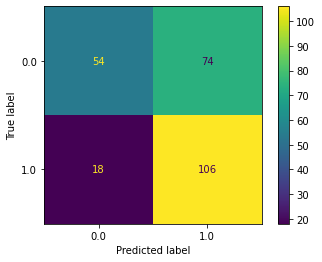

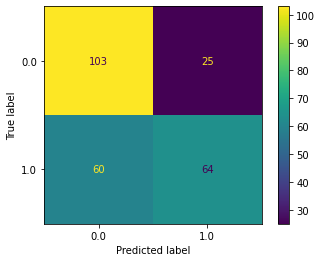

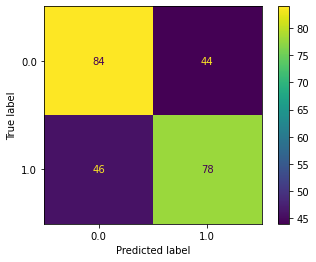

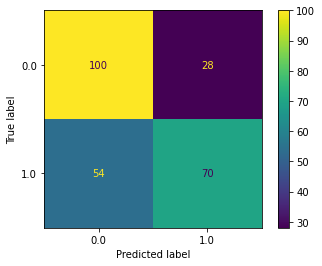

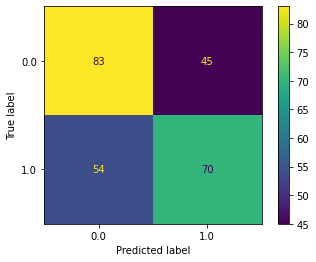

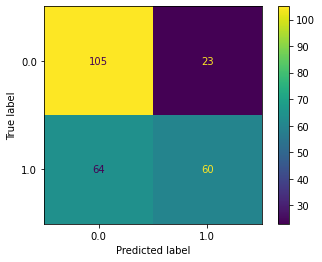

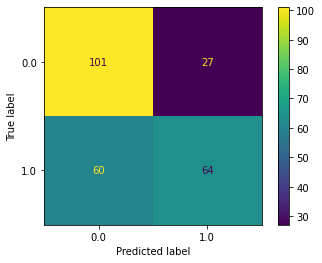

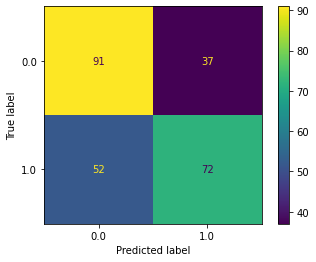

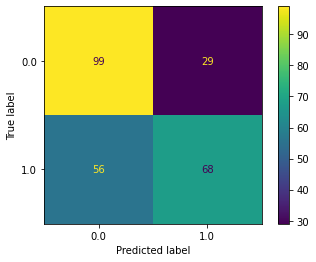

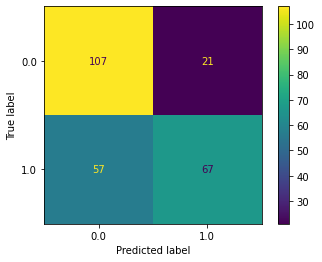

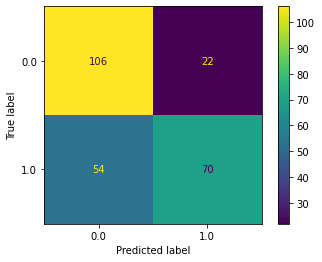

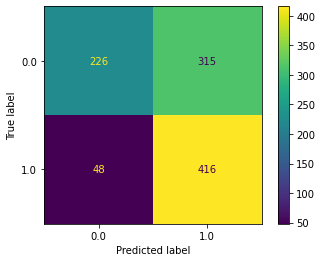

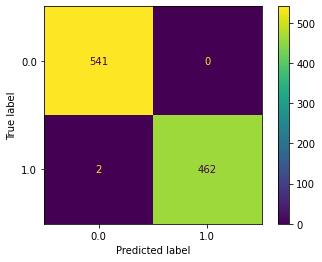

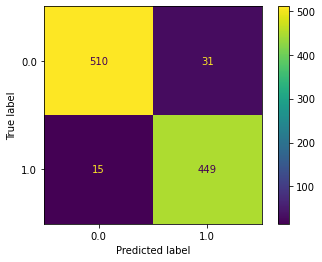

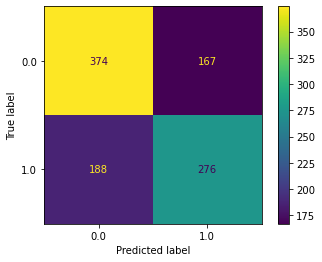

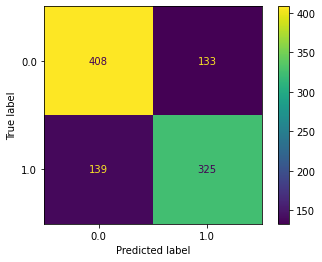

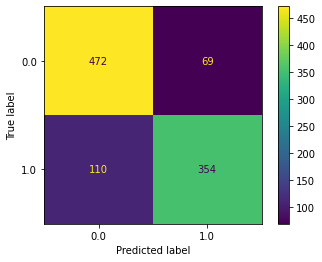

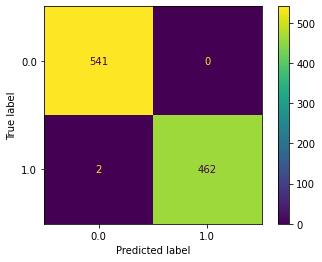

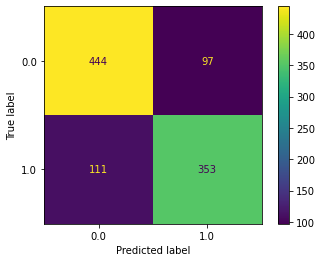

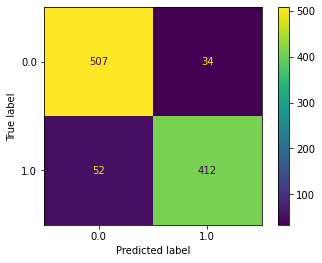

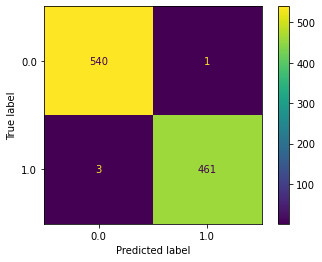

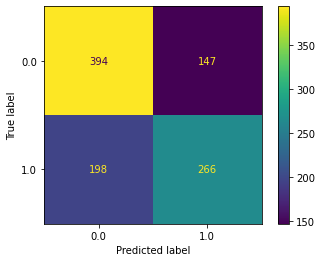

In [41]:

p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p4=plot_confusion_matrix(gnb, X_test, y_test)
p5=plot_confusion_matrix(KNN, X_test, y_test)
p6=plot_confusion_matrix(BC, X_test, y_test)
p7=plot_confusion_matrix(EC, X_test, y_test)
p8=plot_confusion_matrix(ADC, X_test, y_test)
p9=plot_confusion_matrix(GBC, X_test, y_test)
p10=plot_confusion_matrix(BCR, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)


p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p16=plot_confusion_matrix(gnb, X_train, y_train)
p17=plot_confusion_matrix(KNN, X_train, y_train)
p18=plot_confusion_matrix(BC, X_train, y_train)
p19=plot_confusion_matrix(EC, X_train, y_train)
p20=plot_confusion_matrix(ADC, X_train, y_train)
p21=plot_confusion_matrix(GBC, X_train, y_train)
p22=plot_confusion_matrix(BCR, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)


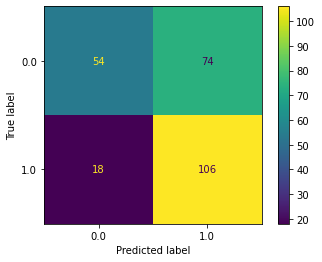

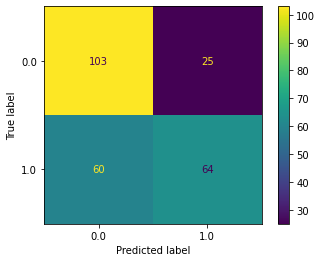

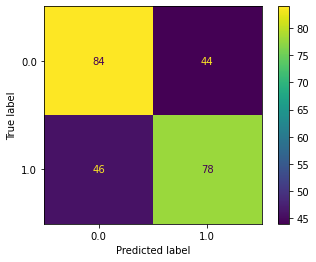

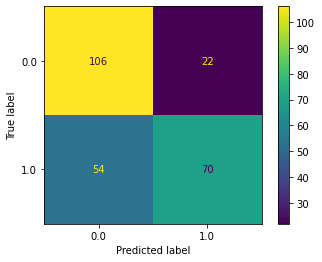

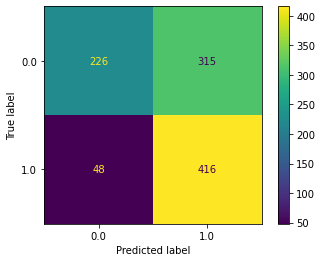

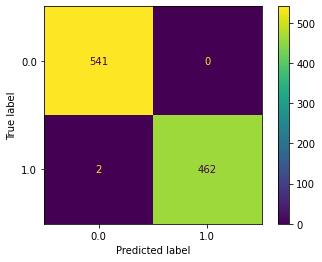

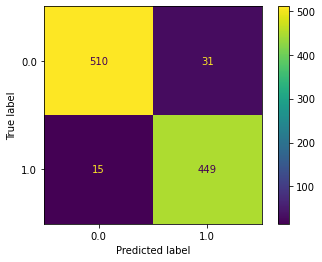

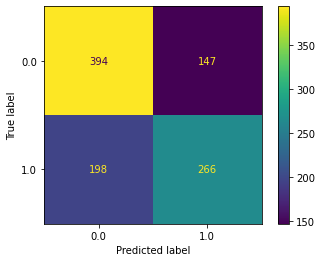

In [42]:
p1=plot_confusion_matrix(dt, X_test, y_test)
p2=plot_confusion_matrix(rf, X_test, y_test)
p3=plot_confusion_matrix(sv, X_test, y_test)
p11=plot_confusion_matrix(LR, X_test, y_test)

p13=plot_confusion_matrix(dt, X_train, y_train)
p14=plot_confusion_matrix(rf, X_train, y_train)
p15=plot_confusion_matrix(sv, X_train, y_train)
p23=plot_confusion_matrix(LR, X_train, y_train)

# Plotting Decision Tree

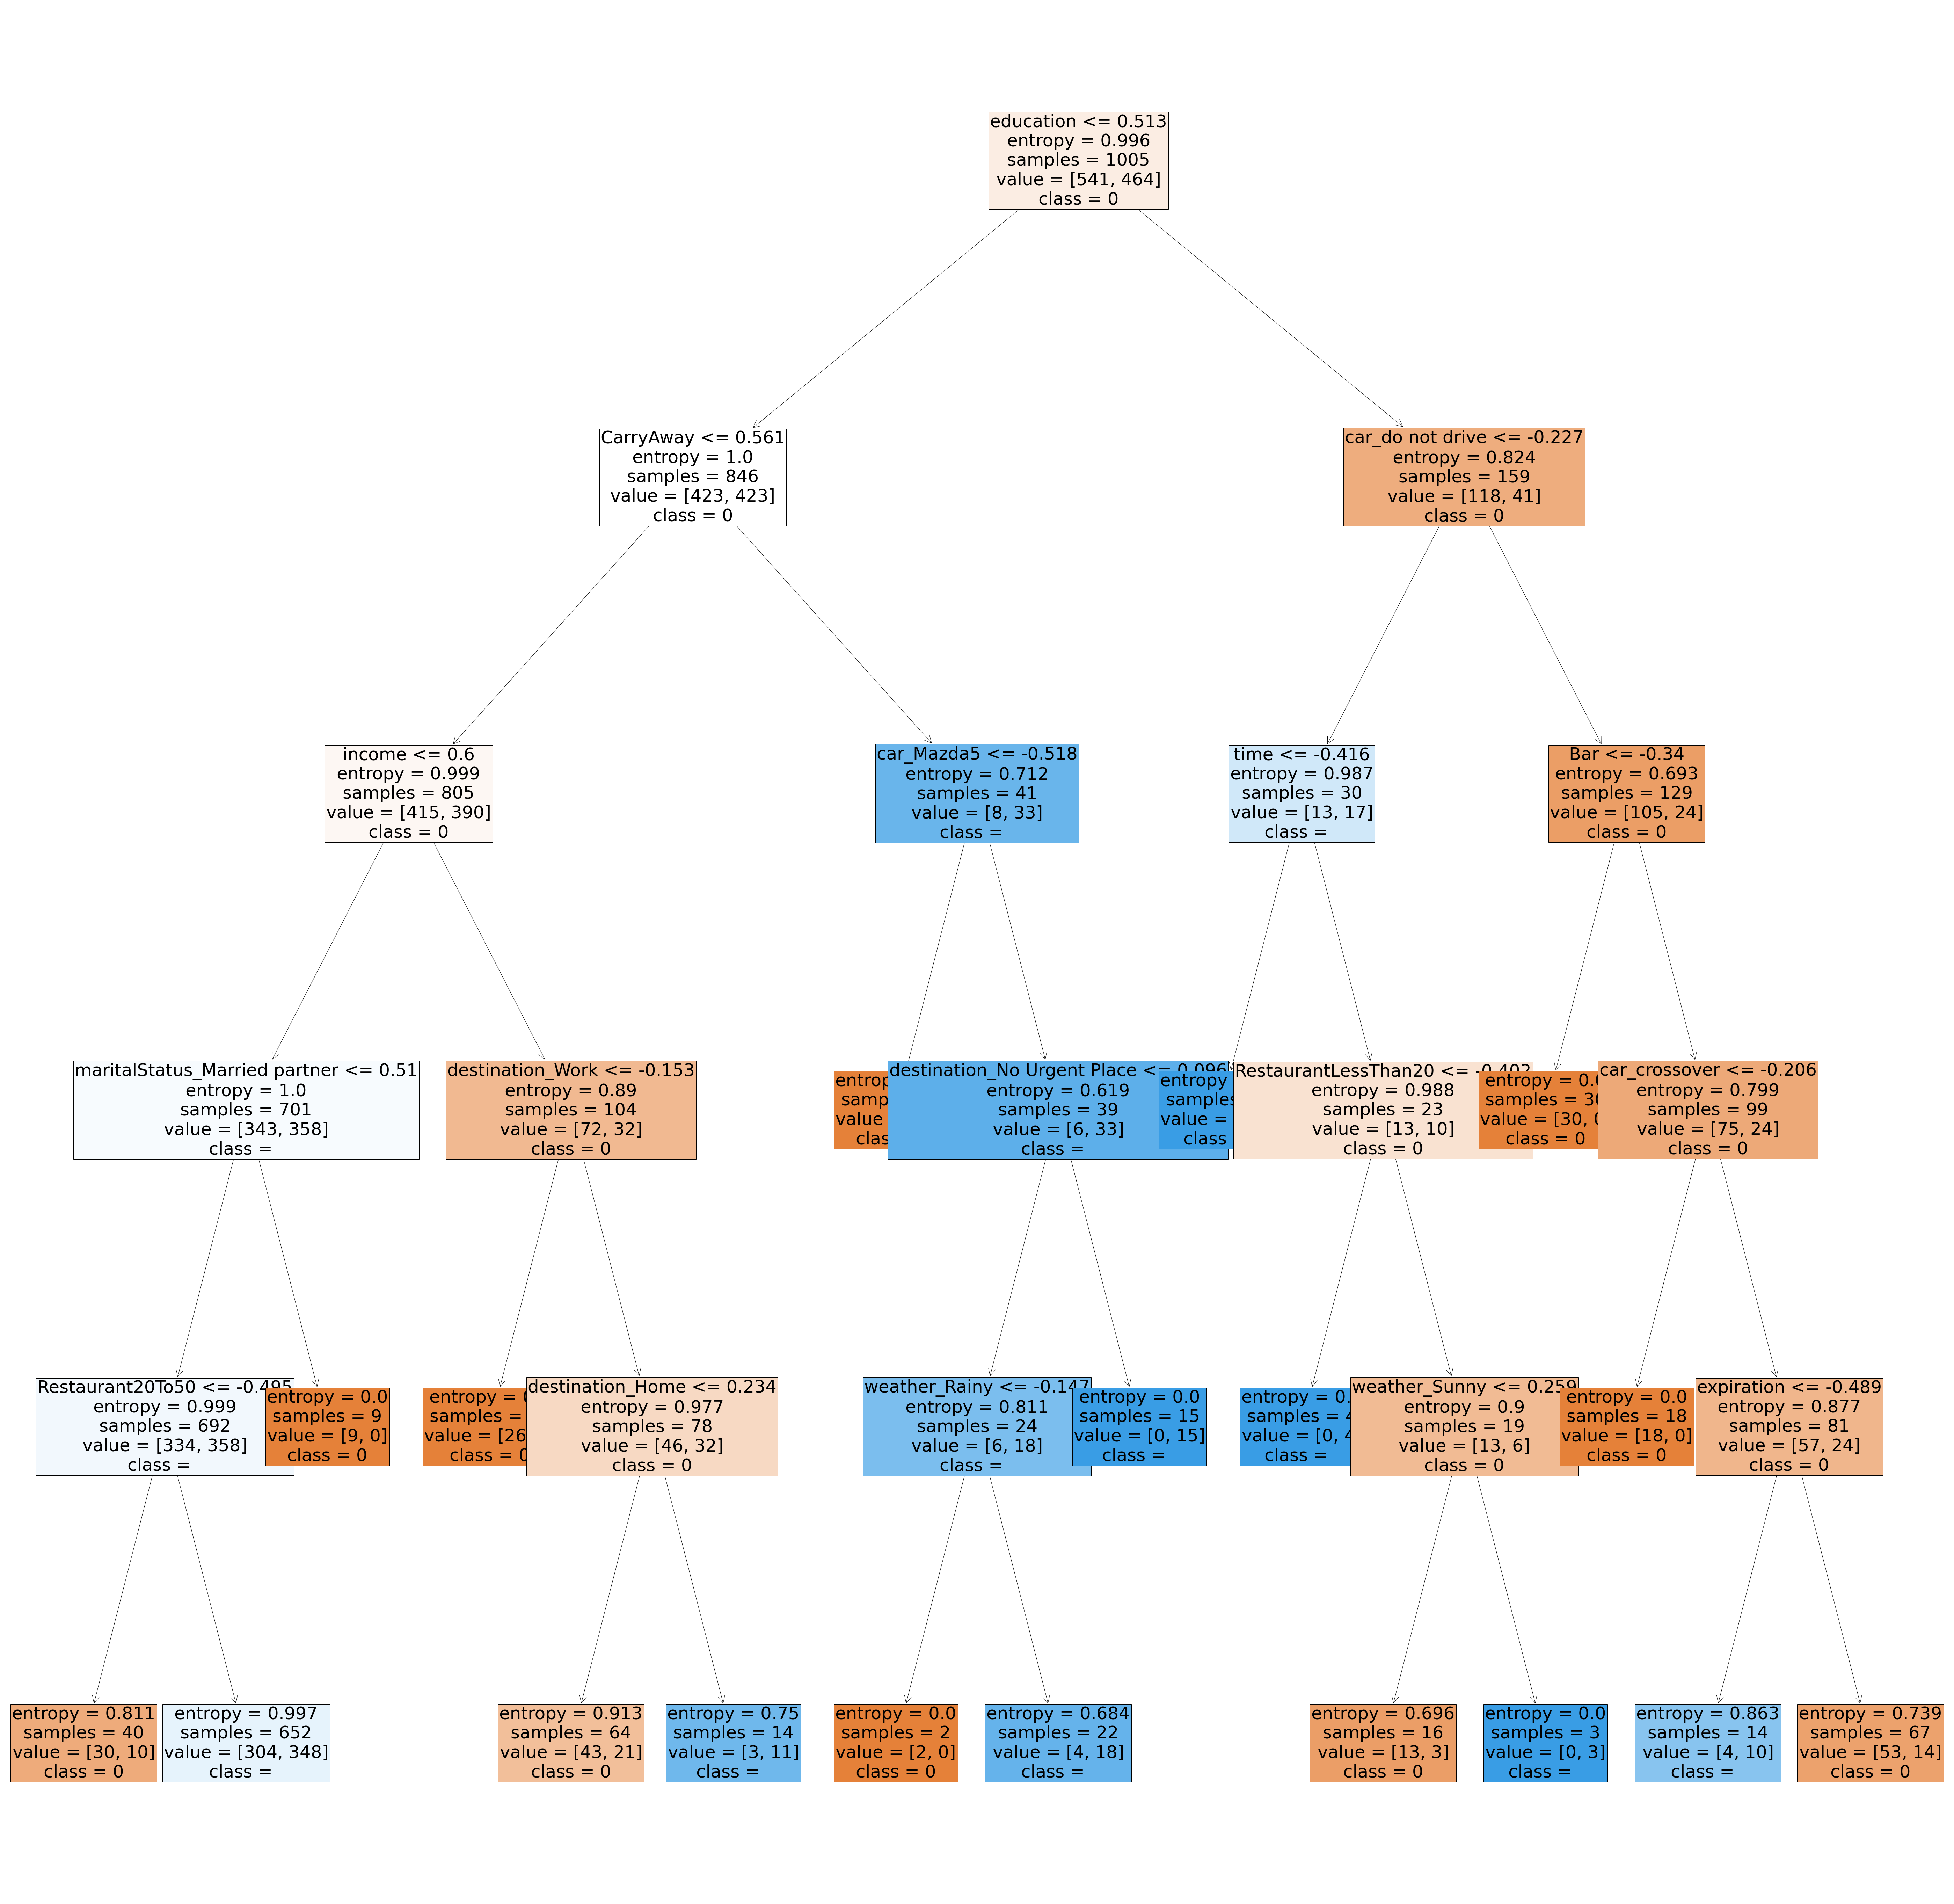

In [43]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(100,100))
fn=np.array(X1.columns)

cn=str(y1)
treee = tree.plot_tree(dt, fontsize=50,feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('dt_individualtree_PCA_R50_Wn.png')

# Validating the Training set Accuracy


In [44]:

dt_pred1 = dt.predict(X_train)
rf_pred1 = rf.predict(X_train)
sv_pred1 = sv.predict(X_train)
gnb_pred1 = gnb.predict(X_train)
KNN_pred1= KNN.predict(X_train)
BC_pred1 = BC.predict(X_train)
EC_pred1 = EC.predict(X_train)
ADC_pred1 = ADC.predict(X_train)
GBC_pred1 = GBC.predict(X_train)
LR_pred1 = LR.predict(X_train)
BCR_pred1 = BCR.predict(X_train)


dt_acc1 = accuracy_score(y_train, dt_pred1)
rf_acc1 = accuracy_score(y_train, rf_pred1)
sv_acc1 = accuracy_score(y_train, sv_pred1)
gnb_acc1 = accuracy_score(y_train, gnb_pred1)
KNN_acc1 = accuracy_score(y_train, KNN_pred1)
BC_acc1 = accuracy_score(y_train, BC_pred1)
EC_acc1 = accuracy_score(y_train, EC_pred1)
ADC_acc1 = accuracy_score(y_train, ADC_pred1)
GBC_acc1 = accuracy_score(y_train, GBC_pred1)
LR_acc1 = accuracy_score(y_train, LR_pred1)
BCR_acc1 = accuracy_score(y_train, BCR_pred1)


dt_auc1 = roc_auc_score(y_train, dt_pred1)
rf_auc1 = roc_auc_score(y_train, rf_pred1)
sv_auc1 = roc_auc_score(y_train, sv_pred1)
gnb_auc1 = roc_auc_score(y_train, gnb_pred1)
KNN_auc1 = roc_auc_score(y_train, KNN_pred1)
BC_auc1 = roc_auc_score(y_train, BC_pred1)
EC_auc1 = roc_auc_score(y_train, EC_pred1)
ADC_auc1 = roc_auc_score(y_train, ADC_pred1)
GBC_auc1 = roc_auc_score(y_train, GBC_pred1)
LR_auc1 = roc_auc_score(y_train, LR_pred1)
BCR_auc1 = roc_auc_score(y_train, BCR_pred1)


print('Decision tree acc: %.6f' % dt_acc1)
print('Random forest acc: %.6f' % rf_acc1)
print('SVM acc: %.6f' % sv_acc1)
print('Nabive Baise acc: %.6f' % gnb_acc1)
print('KNN: %.6f' % KNN_acc1)
print('BAGGING: %.6f' % BC_acc1)
print('Extra tree: %.6f' % EC_acc1)
print('ADC Boosting: %.6f' % ADC_acc1)
print('GDC Boosting: %.6f' % GBC_acc1)
print('Logistic: %.6f' % LR_acc1)
print('BAGGING Random Forest: %.6f' % BCR_acc1)

print()
print('Decision tree AUC: %.6f' % dt_auc1)
print('Random forest AUC: %.6f' % rf_auc1)
print('SVM AUC: %.6f' % sv_auc1)
print('gnb AUC: %.6f' % gnb_auc1)
print('KNN AUC: %.6f' % KNN_auc1)
print('Bagging AUC: %.6f' % BC_auc1)
print('Extra tree AUC: %.6f' % EC_auc1)
print('ADC Boosting: %.6f' % ADC_auc1)
print('GDC Boosting: %.6f' % GBC_auc1)
print('Logistic: %.6f' % LR_auc1)
print('BAGGING Random Forest: %.6f' % BCR_auc1)


Decision tree acc: 0.638806
Random forest acc: 0.998010
SVM acc: 0.954229
Nabive Baise acc: 0.646766
KNN: 0.729353
BAGGING: 0.821891
Extra tree: 0.998010
ADC Boosting: 0.793035
GDC Boosting: 0.914428
Logistic: 0.656716
BAGGING Random Forest: 0.996020

Decision tree AUC: 0.657148
Random forest AUC: 0.997845
SVM AUC: 0.955186
gnb AUC: 0.643070
KNN AUC: 0.727295
Bagging AUC: 0.817695
Extra tree AUC: 0.997845
ADC Boosting: 0.790739
GDC Boosting: 0.912542
Logistic: 0.650778
BAGGING Random Forest: 0.995843


In [45]:
print(dt)
print(rf)
print(sv)
print(gnb)
print(BC)
print(EC)
print(ADC)
print(GBC)
print(KNN)
print(LR)
print(BCR)


DecisionTreeClassifier(criterion='entropy', max_depth=5,
                       random_state=RandomState(MT19937) at 0x218ECB36C40)
RandomForestClassifier(criterion='entropy',
                       random_state=RandomState(MT19937) at 0x218ECB36C40)
SVC(C=15.0)
GaussianNB()
BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=5,
                                                        random_state=RandomState(MT19937) at 0x218ECB36C40),
                  n_estimators=100, random_state=7)
ExtraTreesClassifier(max_features=3)
AdaBoostClassifier(n_estimators=100, random_state=7)
GradientBoostingClassifier(random_state=7)
KNeighborsClassifier()
LogisticRegression(multi_class='multinomial', solver='newton-cg')
BaggingClassifier(base_estimator=RandomForestClassifier(criterion='entropy',
                                                        random_state=RandomState(MT19937) at 0x218ECB36C40),
         

# Voting

In [46]:
from sklearn.ensemble import VotingClassifier

In [47]:
Estimators = []
dt = DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                            random_state=rng)
Estimators.append(('Decision_Tree', dt))

rf = RandomForestClassifier(criterion='entropy', n_estimators=100, 
                            random_state=rng)
Estimators.append(('Random_Forest', rf))

sv = SVC(kernel='rbf', C=15.0)
Estimators.append(('SVM', sv))


LR=LogisticRegression(multi_class='multinomial', solver='newton-cg')
Estimators.append(('Logistic', LR))




In [48]:
# create the ensemble model
ensemble = VotingClassifier(Estimators)
results = cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

0.6022476190476189


# Explorative data analysis


In [49]:
from matplotlib import pyplot

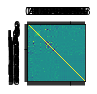

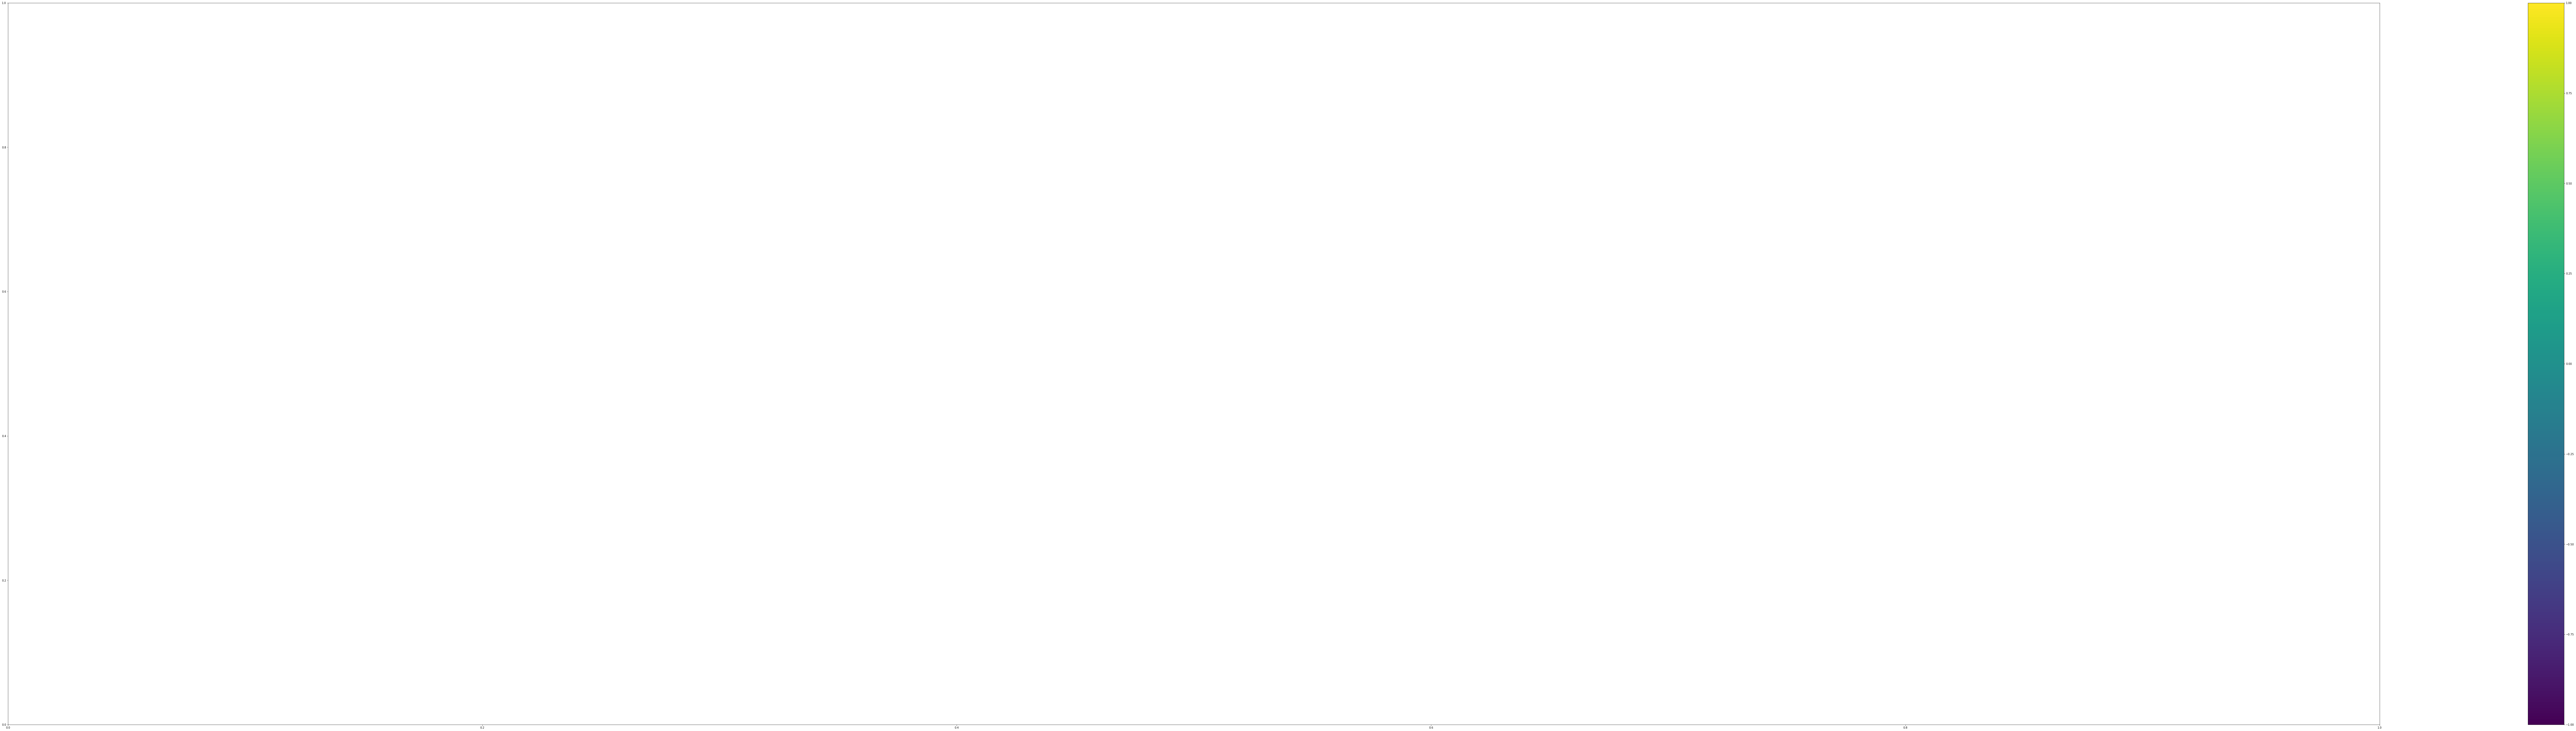

In [50]:
correlations = df.corr(method='pearson')
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(353)
fig = pyplot.figure(figsize =(200,50))
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
names=df.head()
ticks = np.arange(0,59,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [51]:
from pandas.plotting import scatter_matrix

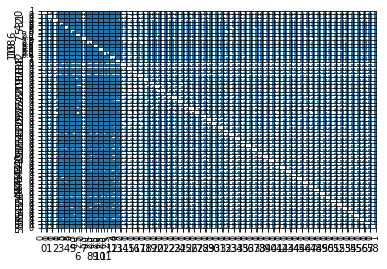

In [52]:
scatter_matrix(df)

pyplot.show()

In [53]:
peek = df.head(20)
print(peek)

     0    1    2    3    4    5    6    7    8    9   ...   49   50   51   52  \
0   0.0  1.0  0.0  3.0  2.0  1.0  3.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  1.0  0.0  3.0  2.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2   1.0  0.0  0.0  5.0  4.0  1.0  3.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
3   1.0  0.0  0.0  5.0  4.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4   1.0  1.0  0.0  6.0  4.0  6.0  3.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
5   1.0  1.0  0.0  6.0  4.0  6.0  0.0  1.0  1.0  2.0  ...  0.0  0.0  0.0  0.0   
6   1.0  0.0  0.0  1.0  3.0  1.0  3.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
7   1.0  0.0  0.0  1.0  3.0  1.0  0.0  1.0  2.0  1.0  ...  0.0  0.0  0.0  0.0   
8   1.0  0.0  0.0  4.0  4.0  2.0  3.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
9   1.0  0.0  0.0  4.0  4.0  2.0  0.0  1.0  2.0  4.0  ...  0.0  0.0  0.0  0.0   
10  1.0  0.0  0.0  3.0  2.0  2.0  3.0  1.0  4.0  4.0  ...  0.0  0.0  0.0  0.0   
11  1.0  0.0  0.0  3.0  2.0 

In [54]:
shape = df.shape
print(shape)

(1257, 59)


In [55]:
type = df.dtypes
print(type)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
dtype: object


In [56]:
from pandas import set_option

In [57]:
set_option('display.width', 200)
set_option('display.max_columns', 10)
set_option('precision', 3)

description = df1.describe()
print(description)

         gender  has_children  direction_same    income  education  ...  occupation_Sales & Related  occupation_Student  occupation_Transportation & Material Moving  occupation_Unemployed         Y
count  1257.000      1257.000        1257.000  1257.000   1257.000  ...                    1257.000            1257.000                                     1257.000               1257.000  1257.000
mean      0.497         0.441           0.180     3.985      3.177  ...                       0.074               0.113                                        0.016                  0.152     0.468
std       0.500         0.497           0.384     2.568      1.235  ...                       0.262               0.317                                        0.125                  0.359     0.499
min       0.000         0.000           0.000     0.000      0.000  ...                       0.000               0.000                                        0.000                  0.000     0.000
25%       

In [58]:
class_counts = df1.groupby('Y').size()
print(class_counts)


Y
0    669
1    588
dtype: int64


In [59]:
correlations = df.corr(method='pearson')
print(correlations)

           0      1          2      3      4   ...         54     55         56         57     58
0   1.000e+00 -0.191 -5.679e-03  0.097 -0.013  ...  8.972e-02  0.072  7.700e-02 -1.727e-01  0.047
1  -1.906e-01  1.000  6.424e-02  0.091  0.064  ... -6.115e-02 -0.210  1.518e-02  8.125e-03 -0.081
2  -5.679e-03  0.064  1.000e+00 -0.024 -0.072  ... -5.705e-03  0.049 -2.642e-02  8.460e-02  0.001
3   9.696e-02  0.091 -2.387e-02  1.000  0.271  ... -3.267e-02 -0.130 -1.163e-02 -7.865e-02  0.005
4  -1.338e-02  0.064 -7.199e-02  0.271  1.000  ... -5.273e-02 -0.134 -8.512e-02 -4.798e-02 -0.111
5  -1.371e-01  0.457 -1.260e-02  0.069  0.134  ...  2.287e-02 -0.399  4.434e-02 -9.859e-02 -0.047
6   6.524e-03  0.138 -7.767e-03  0.004 -0.006  ... -2.063e-02  0.014 -1.906e-02  3.487e-02 -0.056
7  -5.786e-03 -0.020 -7.361e-02 -0.011 -0.076  ... -6.841e-03  0.038  1.068e-03 -6.665e-02  0.227
8   1.937e-01 -0.248 -1.551e-02  0.044  0.028  ...  2.667e-02 -0.047  3.245e-02 -3.788e-02  0.035
9  -1.000e-01  0.031

In [60]:
skew = df.skew()
print(skew)

0      0.011
1      0.239
2      1.670
3      0.203
4     -0.174
5      0.403
6     -0.261
7     -0.611
8      0.783
9      0.314
10    -0.020
11     0.169
12     1.399
13     0.238
14    17.663
15    25.040
16    25.040
17    17.663
18     0.239
19     1.012
20     0.955
21    -0.731
22     2.461
23     2.305
24     2.788
25     4.513
26     2.317
27    -1.810
28     4.562
29     0.265
30     0.568
31     2.003
32     8.434
33    10.100
34     4.466
35    13.304
36     3.982
37     7.368
38     2.375
39     7.551
40     3.131
41    20.421
42     5.838
43     6.246
44     6.033
45     8.186
46     6.886
47     9.692
48     3.880
49     4.248
50     8.186
51     9.692
52     7.551
53     5.131
54     3.259
55     2.448
56     7.747
57     1.941
58     0.129
dtype: float64


In [61]:
skew.to_csv('Skew2_PCA_R50_Wn.csv', index=False)

In [62]:
correlations.to_csv('correlations_PCA_R50_Wn.csv', index=False)

In [63]:
description.to_csv('description_PCA_R50_Wn.csv', index=False)

# Random Forest Tree

In [64]:
from sklearn.tree import export_graphviz

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

<Figure size 14400x11520 with 0 Axes>

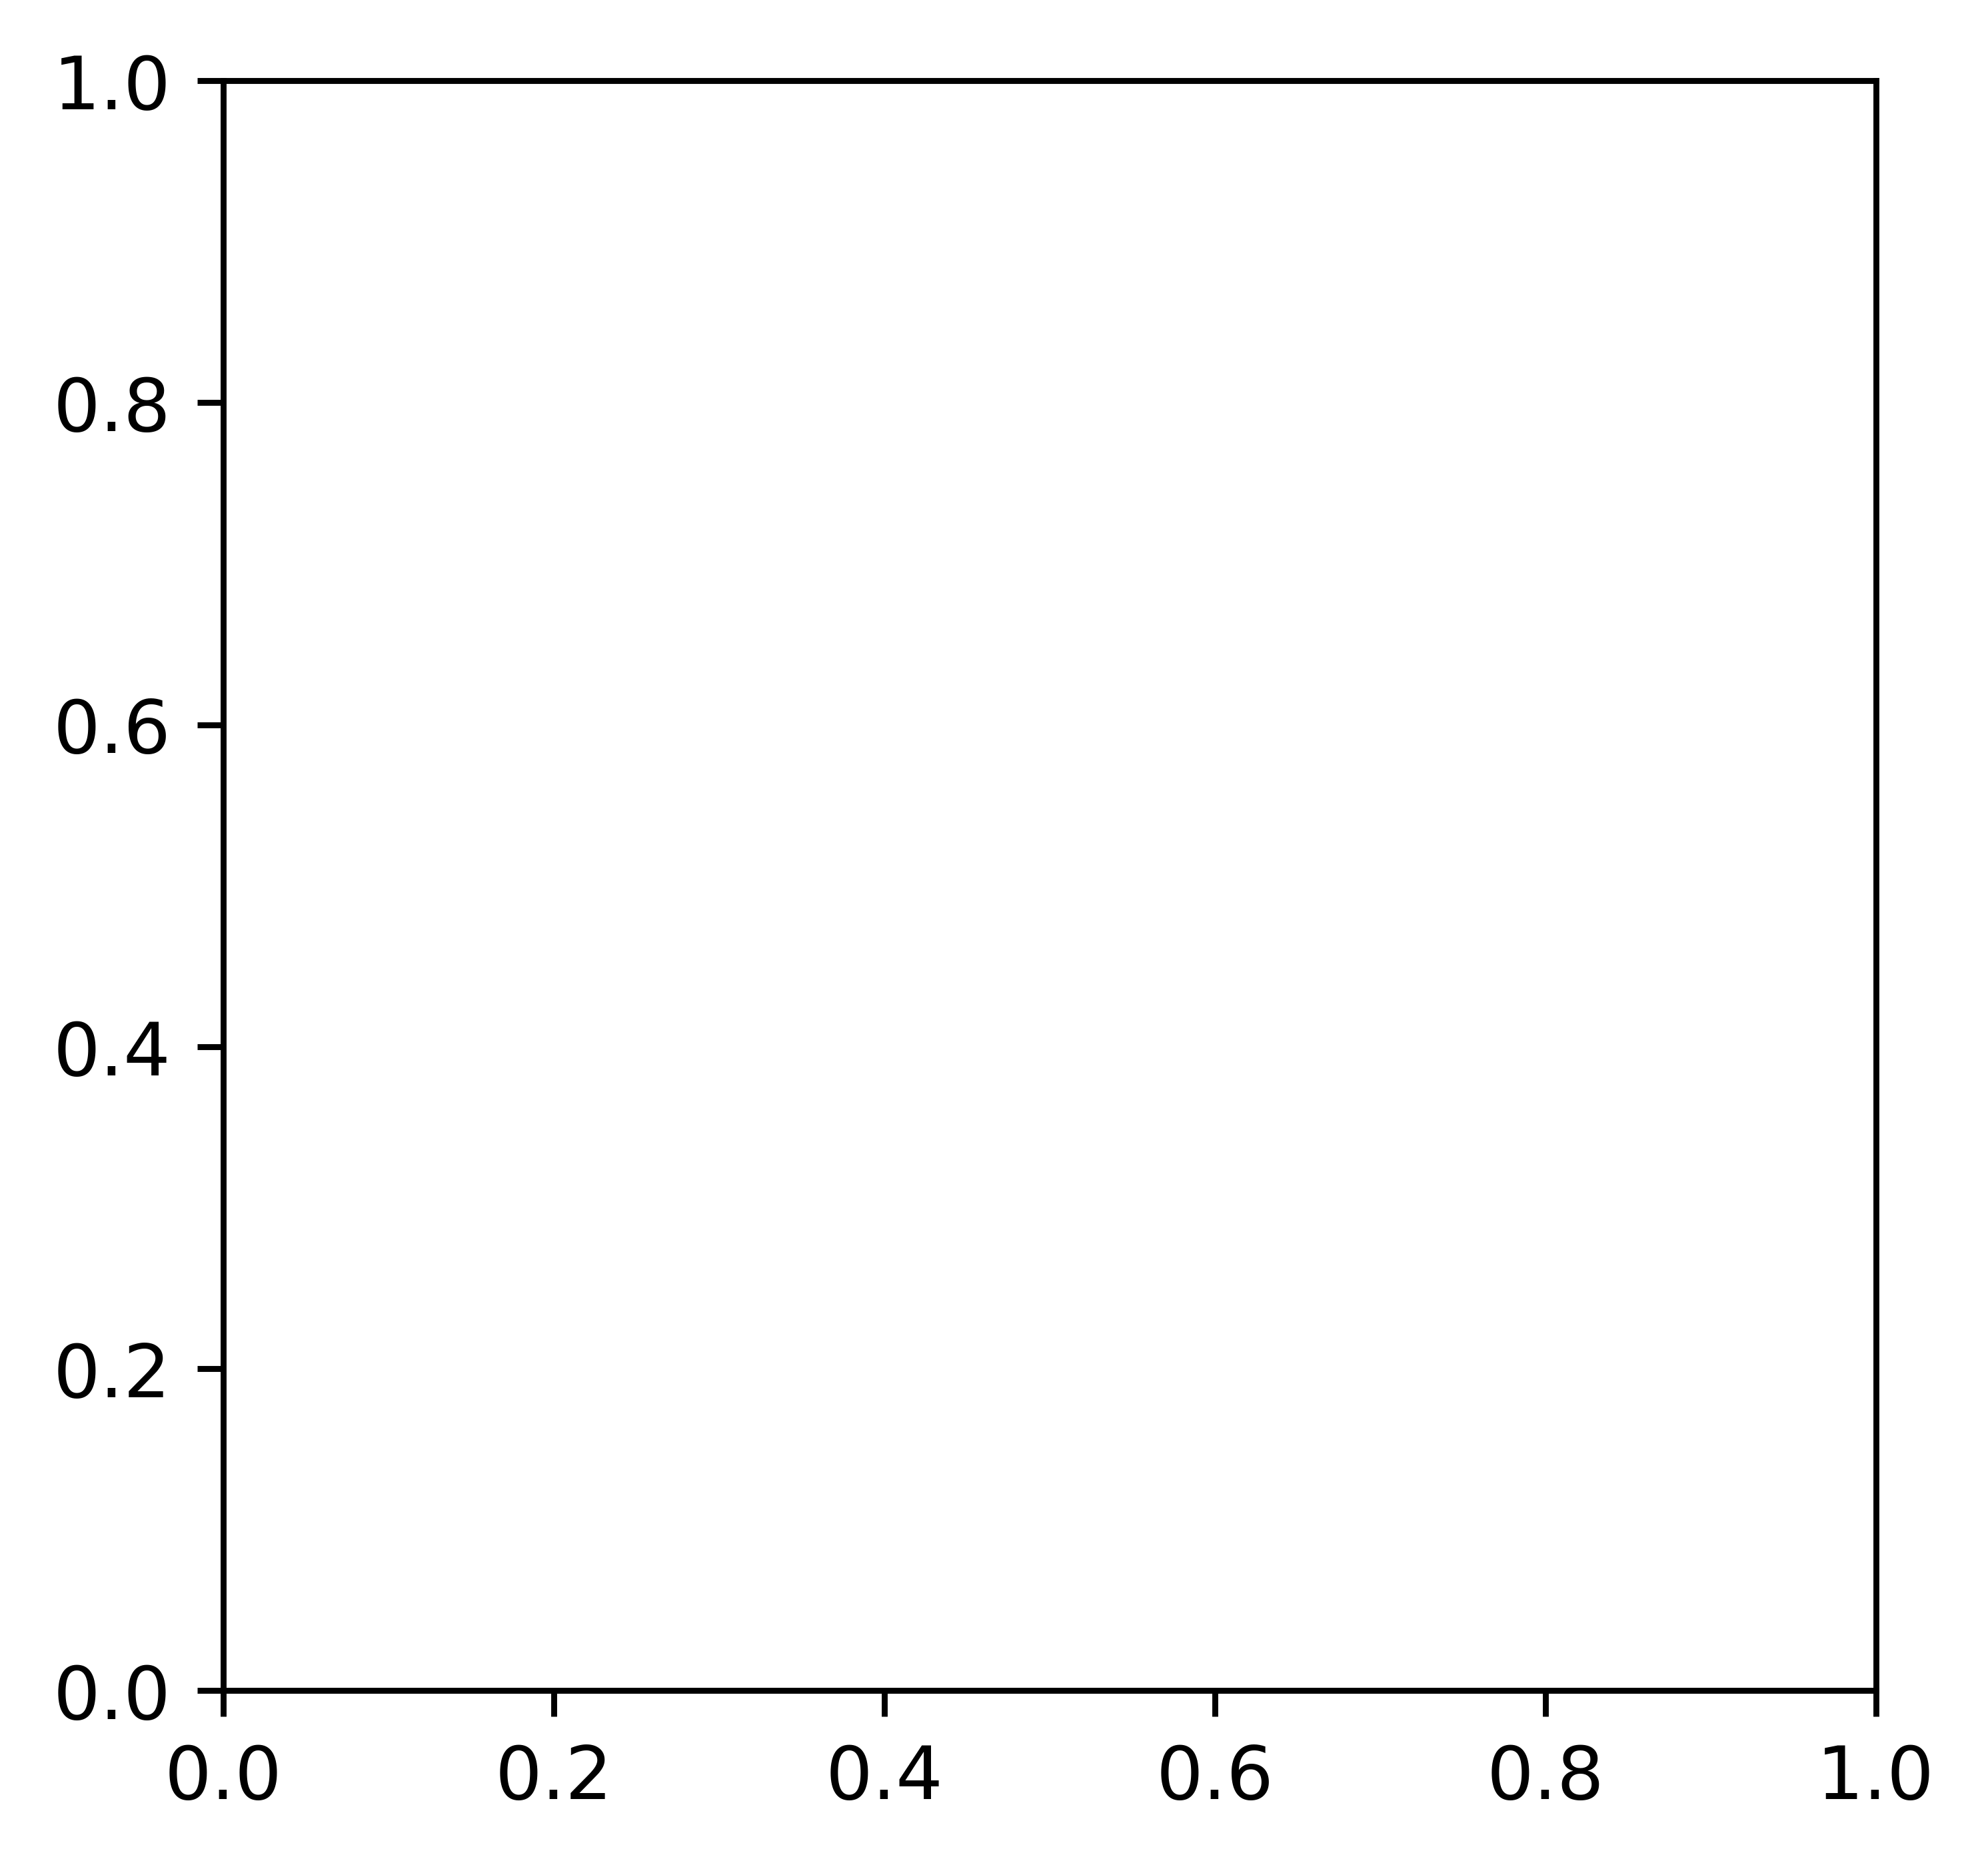

In [65]:
from sklearn import tree
import pydotplus
fig = plt.figure(figsize=(200,160))
fn=np.array(X1.columns)
cn=str(y1)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('rf_individualtree_PCA_R50_Wn.png')